In [2]:
import pandas as pd
URLCSV = "https://docs.google.com/spreadsheets/d/1Fuj72q5oIxLK74jBfdvI9pNr5Er2rPONfwh3szMq6-Q/export?format=csv"
dane = pd.read_csv(URLCSV)
print(dane.head())

   height  handedness  right_hand_span  left_hand_span  head_circ eye_colour  \
0     159        0.88             19.0            19.0       54.0       Blue   
1     160       -1.00             19.0            20.0       57.0      Green   
2     161        0.79             17.0            16.5       57.0      hazel   
3     161        1.00             17.0            17.5       54.0       Blue   
4     162        0.79             16.0            16.0       57.0       gray   

   gender  siblings  movies  soda   bedtime       fb_freq  fb_friends  \
0  Female         2     3.0   7.0  02:00:00    once a day       135.0   
1  Female         2     0.5   2.0  04:30:00             0         1.0   
2  Female         3     3.0   2.0  23:50:00   once a week       354.0   
3  Female         2     2.0   0.5  23:00:00    once a day       200.0   
4  Female         2     0.0   2.0  23:10:00  almost never       192.0   

                  stat_likert  
0  Neither agree nor disagree  
1              S

In [3]:
import numpy as np
np.mean(dane['head_circ'])

np.float64(57.011842105263156)

In [5]:
import math
import scipy.stats as stats

data = dane['head_circ'].dropna()
test_result = stats.ttest_1samp(data, popmean=np.mean(data))
conf_int = test_result.confidence_interval(0.95)
print(conf_int)

ConfidenceInterval(low=np.float64(56.3453246623508), high=np.float64(57.678359548175514))


In [8]:
data = dane['movies'].dropna()
test_result = stats.ttest_1samp(data, popmean=np.mean(data))
conf_int = test_result.confidence_interval(0.95)
print(np.mean(data))
print(conf_int)

1.3982666666666668
ConfidenceInterval(low=np.float64(1.1304273840308394), high=np.float64(1.6661059493024941))


In [13]:
mask = dane['height'].notna() & dane['head_circ'].notna()
x = dane['height'][mask]
y = dane['head_circ'][mask]
correlation_test = stats.pearsonr(x, y)
confidence_interval = correlation_test.confidence_interval(0.95)
print('Test:\n\n', correlation_test, '\n\n Confidence interval: \n\n', confidence_interval)

Test:

 PearsonRResult(statistic=np.float64(0.588700183421883), pvalue=np.float64(2.2294040330721613e-08)) 

 Confidence interval: 

 ConfidenceInterval(low=np.float64(0.41883478923487844), high=np.float64(0.7187580473834372))


In [16]:
# Kod zamieniający wszystko inne niż blue, brown i green na Other
dane.loc[~dane['eye_colour'].isin(['Blue', 'Brown', 'Green']), 'eye_colour'] = 'Other'
pd.crosstab(dane['eye_colour'], dane['gender'])

gender,Female,Male
eye_colour,,
Blue,15,13
Brown,11,16
Green,3,12
Other,4,3


In [18]:
m = np.array(pd.crosstab(dane['eye_colour'], dane['gender']))
cramers_v = np.sqrt(stats.chi2_contingency(m, correction=False)[0] / m.sum() / min(m.shape[0]-1, m.shape[1]-1))
print(cramers_v)

0.2584975583140409


In [19]:
nsim = 1000
n=77
def sim():
    indices = np.random.choice(n, n, replace=True)
    bootstrap_sample = dane.iloc[indices]
    m = np.array(pd.crosstab(bootstrap_sample['eye_colour'], bootstrap_sample['gender']))
    return(np.sqrt(stats.chi2_contingency(m, correction=False)[0] / m.sum() / min(m.shape[0]-1, m.shape[1]-1)))

results = [sim() for _ in range(nsim)]
np.quantile(results, [0.025, 0.975])

array([0.11190755, 0.48664529])

(array([ 24.,  63., 117., 184., 260., 203., 101.,  37.,   9.,   2.]),
 array([0.05082044, 0.11000075, 0.16918107, 0.22836139, 0.28754171,
        0.34672203, 0.40590235, 0.46508267, 0.52426299, 0.5834433 ,
        0.64262362]),
 <BarContainer object of 10 artists>)

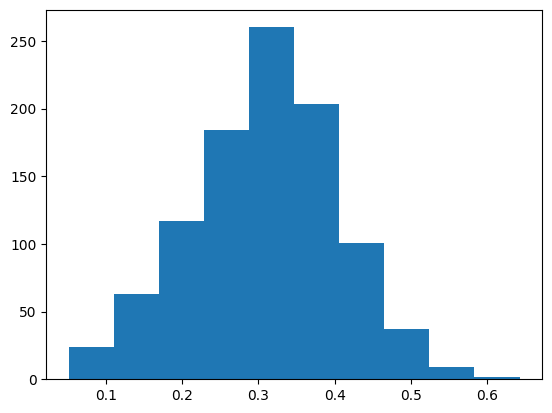

In [22]:
import matplotlib.pyplot as plt
plt.hist(results)

In [25]:
nsim = 10000
n=77
def sim():
    indices = np.random.choice(n, n, replace=True)
    bootstrap_sample = dane.iloc[indices]
    return(np.mean(bootstrap_sample['movies']))

results = [sim() for _ in range(nsim)]
np.quantile(results, [0.025, 0.975])

array([1.14759243, 1.66145785])

In [24]:
data = dane['movies'].dropna()
test_result = stats.ttest_1samp(data, popmean=np.mean(data))
conf_int = test_result.confidence_interval(0.95)
print(np.mean(data))
print(conf_int)

1.3982666666666668
ConfidenceInterval(low=np.float64(1.1304273840308394), high=np.float64(1.6661059493024941))
